jupyter notebook to explore trends in product data

### Key Takeaways:
1. In terms of product categories, LC (Learning and Curriculum) dominates with almost 70% of products in that category. CM (Classroom Management),and SDO (School & District Operations) have an almost equal split 
2. In terms of user segments, most of the products understandbly fall in the PreK-12 category (since it's a big enough bucket)
3. Within Learning and Curriculum, top 3 product categories are: 
    - Digital Learning Platforms,
    - Sites, Resources & Reference and
    - Content Creation & Curation

4. Top companies are:
    - Google
    - Houghton Mifflin Harcourt
    - Microsoft

5. However, there is a tremendous variation in the nature of products. E.g. Audible and Vimeo are listed as EdTech products, which may not be helping students with learning and/or catching up with school. Engagement on specific products would help in understanding and hypothesizing what students would have learnt

In [1]:
# Importing libararies
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the data
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
data_dir = os.path.join(parent_dir, 'data')
file_name = 'products_info.csv'
file_path = os.path.join(data_dir, file_name)

# Print to check the file path
print(file_path)

/Users/eshan23/eshanprashar_git_profile/kaggle_practice/L1_education/covid_edtech_usage/data/products_info.csv


In [3]:
# Read products csv file
df_products = pd.read_csv(file_path)

# Examine the data
print(f"Product data has {df_products.shape[0]} rows and {df_products.shape[1]} columns. Top 10 rows are:")
df_products.head(10)

Product data has 372 rows and 6 columns. Top 10 rows are:


,LP ID,URL,Product Name,Provider/Company Name,Sector(s),Primary Essential Function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC - Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC - Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,"LC - Sites, Resources & Reference - Games & Si..."
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC - Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC - Digital Learning Platforms
5,37600,http://www.activelylearn.com/,Actively Learn,Actively Learn,PreK-12,LC - Digital Learning Platforms
6,18663,http://www.adaptedmind.com,AdaptedMind,GloWorld,PreK-12,LC - Digital Learning Platforms
7,65131,http://www.amplify.com/,Amplify,"Amplify Education, Inc.",PreK-12,LC - Courseware & Textbooks
8,26491,http://www.answers.com/,Answers,Answers,PreK-12; Higher Ed,LC - Study Tools - Q&A
9,56441,http://www.audible.com,Audible,"Amazon.com, Inc.",PreK-12; Higher Ed; Corporate,"LC - Sites, Resources & Reference - Streaming ..."


In [5]:
# Examining unique values across product name company name, sector and primary essential function
# Renaming columns first according to convention
df_products.rename(columns={
    'LP ID': 'lp_id',
    'URL': 'url',
    'Product Name': 'product_name',
    'Provider/Company Name': 'company_name',
    'Sector(s)': 'sector',
    'Primary Essential Function': 'primary_function'
    }, inplace=True)

# Splitting the function based on first hyphen. We'll call the first part primary function and second part secondary function
if 'secondary_function' not in df_products.columns:
    try:
        df_products[['primary_function', 'secondary_function']] = df_products['primary_function'].str.split(' - ', n=1, expand=True)
    except:
        print("Already split into primary and secondary functions")
    
#if 'tertiary_function' not in df_products.columns: # check presence of hyphen in every row
for index, row in df_products.iterrows():
    # First check if secondary function is not NaN
    if pd.isnull(row['secondary_function']):
        continue

    if '-' in row['secondary_function']:
        parts = row['secondary_function'].split(' - ', 1)
        df_products.at[index, 'secondary_function'] = parts[0]
        if len(parts) > 1:  # Ensure there are at least two parts after the split
            df_products.at[index, 'tertiary_function'] = parts[1]
        else:  # If there is no second part, copy the first part
            df_products.at[index, 'tertiary_function'] = parts[0]
    else:
        df_products.at[index,'tertiary_function'] = row['secondary_function']

# Examine the dataset
df_products.head(10)

,lp_id,url,product_name,company_name,sector,primary_function,secondary_function,tertiary_function
0,13117,https://www.splashmath.com,SplashLearn,StudyPad Inc.,PreK-12,LC,Digital Learning Platforms,Digital Learning Platforms
1,66933,https://abcmouse.com,ABCmouse.com,"Age of Learning, Inc",PreK-12,LC,Digital Learning Platforms,Digital Learning Platforms
2,50479,https://www.abcya.com,ABCya!,"ABCya.com, LLC",PreK-12,LC,"Sites, Resources & Reference",Games & Simulations
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC,Digital Learning Platforms,Digital Learning Platforms
4,73104,https://www.achieve3000.com/,Achieve3000,Achieve3000,PreK-12,LC,Digital Learning Platforms,Digital Learning Platforms
5,37600,http://www.activelylearn.com/,Actively Learn,Actively Learn,PreK-12,LC,Digital Learning Platforms,Digital Learning Platforms
6,18663,http://www.adaptedmind.com,AdaptedMind,GloWorld,PreK-12,LC,Digital Learning Platforms,Digital Learning Platforms
7,65131,http://www.amplify.com/,Amplify,"Amplify Education, Inc.",PreK-12,LC,Courseware & Textbooks,Courseware & Textbooks
8,26491,http://www.answers.com/,Answers,Answers,PreK-12; Higher Ed,LC,Study Tools,Q&A
9,56441,http://www.audible.com,Audible,"Amazon.com, Inc.",PreK-12; Higher Ed; Corporate,LC,"Sites, Resources & Reference",Streaming Services


In [9]:
# Save this modified dataframe to a new csv file
df_products.to_csv(os.path.join(data_dir, 'products_info_modified.csv'), index=False)

In [8]:
# Filter for specific product(s)
top_20_products = [95731, 32213, 61292, 47364, 98845, 20069, 24711, 33185, 99916, 78063, 59434, 28504, 25559, 76649, 95253, 36859, 61945, 36692,61441, 92993]
df_products_top_20 = df_products[df_products['lp_id'].isin(top_20_products)]
df_products_top_20

,lp_id,url,product_name,company_name,sector,primary_function,secondary_function,tertiary_function
3,92993,http://www.aleks.com/,ALEKS,McGraw-Hill PreK-12,PreK-12; Higher Ed,LC,Digital Learning Platforms,Digital Learning Platforms
17,47364,https://www.canvas.net/,Canvas,"Instructure, Inc.",PreK-12; Higher Ed; Corporate,LC,Online Course Providers & Technical Skills Dev...,Online Course Providers & Technical Skills Dev...
20,76649,https://clever.com/,Clever,Clever,PreK-12,SDO,School Management Software,SSO
34,95253,http://www.edgenuity.com/,Edgenuity,Edgenuity Inc.,PreK-12; Higher Ed; Corporate,LC,Digital Learning Platforms,Digital Learning Platforms
48,95731,http://docs.google.com/,Google Docs,Google LLC,PreK-12; Higher Ed; Corporate,LC,Content Creation & Curation,Content Creation & Curation
49,99916,https://drive.google.com/start,Google Drive,Google LLC,PreK-12; Higher Ed; Corporate,LC/CM/SDO,Other,Other
51,33185,http://www.google.com/forms/about/,Google Forms,Google LLC,PreK-12; Higher Ed; Corporate,CM,Classroom Engagement & Instruction,Assessment & Classroom Response
69,24711,https://kahoot.it,Kahoot!,Kahoot! AS,PreK-12; Higher Ed; Corporate,LC,Study Tools,Study Tools
74,25559,http://www.lexialearning.com/,Lexia Core5 Reading,Lexia Learning,PreK-12,LC,Digital Learning Platforms,Digital Learning Platforms
112,20069,http://www.schoology.com/,Schoology,Schoology,PreK-12,SDO,Learning Management Systems (LMS),Learning Management Systems (LMS)


In [33]:
# Exploring value_counts for sector
df_products['sector'].value_counts()

sector
PreK-12                          170
PreK-12; Higher Ed; Corporate    115
PreK-12; Higher Ed                65
Corporate                          1
Higher Ed; Corporate               1
Name: count, dtype: int64

In [75]:
# Exploring value_counts for primary_function
df_products['primary_function'].value_counts()

primary_function
LC           272
CM            34
SDO           30
LC/CM/SDO     16
Name: count, dtype: int64

In [88]:
# Exploring value_counts for primary_function
df_products['secondary_function'].value_counts()

secondary_function
Sites, Resources & Reference                              97
Digital Learning Platforms                                74
Content Creation & Curation                               36
Study Tools                                               35
Classroom Engagement & Instruction                        20
Courseware & Textbooks                                    18
Other                                                     18
Data, Analytics & Reporting                               11
Teacher Resources                                          7
Virtual Classroom                                          7
Learning Management Systems (LMS)                          5
Online Course Providers & Technical Skills Development     5
Human Resources                                            4
Sites, Resources & References                              4
School Management Software                                 4
Career Planning & Job Search                               3
Large

In [87]:
# Exploring value_counts for secondary_function
df_products['tertiary_function'].value_counts()

tertiary_function
Digital Learning Platforms                                74
Sites, Resources & Reference                              70
Content Creation & Curation                               36
Study Tools                                               28
Courseware & Textbooks                                    18
Other                                                     18
Games & Simulations                                       12
Classroom Engagement & Instruction                         9
Data, Analytics & Reporting                                9
Digital Collection & Repository                            8
Classroom Management                                       7
Video Conferencing & Screen Sharing                        5
Streaming Services                                         5
Online Course Providers & Technical Skills Development     5
Learning Management Systems (LMS)                          5
Q&A                                                        4
Human 

In [91]:
# Exploring primary and secondary functions
function_counts = df_products.groupby(['sector','secondary_function']).size().reset_index(name='product_counts')

# Add a column that displays % of total product_counts
total_products = function_counts['product_counts'].sum()
function_counts['product_percentage'] = ((function_counts['product_counts'] / total_products) * 100).round(2)
function_counts.sort_values(by='product_percentage', ascending=False, inplace=True)
function_counts['product_cumsum_percentage'] = (function_counts['product_percentage']).cumsum().round(2)
function_counts.head(15)

,sector,secondary_function,product_counts,product_percentage,product_cumsum_percentage
8,PreK-12,Digital Learning Platforms,66,18.75,18.75
15,PreK-12,"Sites, Resources & Reference",38,10.80,29.55
44,PreK-12; Higher Ed; Corporate,"Sites, Resources & Reference",30,8.52,38.07
29,PreK-12; Higher Ed,"Sites, Resources & Reference",29,8.24,46.31
34,PreK-12; Higher Ed; Corporate,Content Creation & Curation,27,7.67,53.98
30,PreK-12; Higher Ed,Study Tools,17,4.83,58.81
42,PreK-12; Higher Ed; Corporate,Other,16,4.55,63.36
6,PreK-12,Courseware & Textbooks,14,3.98,67.34
17,PreK-12,Study Tools,12,3.41,70.75
33,PreK-12; Higher Ed; Corporate,Classroom Engagement & Instruction,10,2.84,73.59


In [99]:
# Creating a visual to plot products per company split into sectors
# Aggregate data to get the count of products by company
product_counts = df_products.groupby(['company_name']).size().reset_index(name='product_count')
total_products = product_counts['product_count'].sum()
product_counts['product_percentage'] = ((product_counts['product_count'] / total_products) * 100).round(2)
product_counts.sort_values(by='product_count', ascending=False, inplace=True)
product_counts['product_cumsum_percentage'] = (product_counts['product_percentage']).cumsum().round(2)
top_product_counts = product_counts.sort_values(by='product_count', ascending=False).head(20)
top_product_counts

,company_name,product_count,product_percentage,product_cumsum_percentage
96,Google LLC,30,8.09,8.09
104,Houghton Mifflin Harcourt,6,1.62,11.33
152,Microsoft,6,1.62,9.71
129,Learning A-Z,4,1.08,12.41
109,IXL Learning,4,1.08,13.49
170,PBS,3,0.81,17.54
77,"ExploreLearning, LLC",3,0.81,20.78
1,"Autodesk, Inc",3,0.81,19.97
148,McGraw-Hill PreK-12,3,0.81,18.35
234,The College Board,3,0.81,19.16


/var/folders/54/mhs5zkcs6zb1_y58hd7pczjc0000gn/T/ipykernel_8894/1014012611.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Sector')


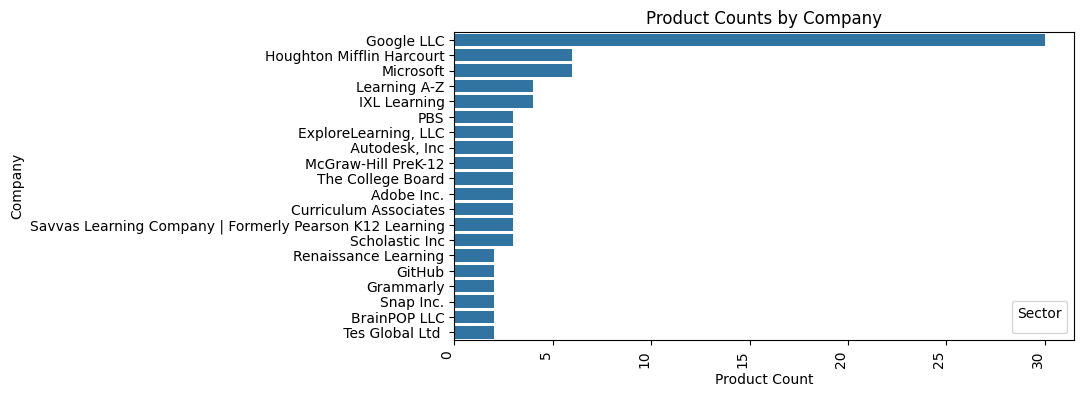

In [100]:
# Plotting the distribution of products by company and sector
plt.close()
plt.figure(figsize=(8,4))
sns.barplot(y='company_name', x='product_count',data=top_product_counts)

# Customize the plot
plt.title('Product Counts by Company')
plt.xlabel('Product Count')
plt.ylabel('Company')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Sector')
#plt.tight_layout()
plt.show()

In [102]:
# Products where secondary_function is Digital Learning Platforms
function_name = 'Content Creation & Curation' # Digital Learning Platforms, Sites, Resources & Reference, Content Creation & Curation
digital_learning_products = df_products[df_products['secondary_function'] == function_name]
digital_learning_products.head(10)

,lp_id,url,product_name,company_name,sector,primary_function,secondary_function,tertiary_function
13,49563,https://bookcreator.com/,Book Creator,"Tools for Schools, Inc. (Book Creator)",PreK-12,LC,Content Creation & Curation,Content Creation & Curation
40,19044,https://fligprid.com,Flipgrid,Flipgrid,PreK-12,LC,Content Creation & Curation,Content Creation & Curation
48,95731,http://docs.google.com/,Google Docs,Google LLC,PreK-12; Higher Ed; Corporate,LC,Content Creation & Curation,Content Creation & Curation
66,59257,http://www.issuu.com,Issuu,Issuu,PreK-12; Higher Ed; Corporate,LC,Content Creation & Curation,Content Creation & Curation
90,73101,http://padlet.com/,Padlet,Padlet,PreK-12; Higher Ed; Corporate,LC,Content Creation & Curation,Content Creation & Curation
93,37017,https://pixlr.com/,Pixlr,Pixlr,PreK-12; Higher Ed; Corporate,LC,Content Creation & Curation,Content Creation & Curation
95,65358,http://www.prezi.com,Prezi,Prezi Inc.,PreK-12; Higher Ed; Corporate,LC,Content Creation & Curation,Content Creation & Curation
114,71805,http://scratch.mit.edu/,Scratch,MIT Media Lab,PreK-12,LC,Content Creation & Curation,Content Creation & Curation
128,78586,http://www.thinglink.com,ThingLink,ThingLink,PreK-12; Higher Ed; Corporate,LC,Content Creation & Curation,Content Creation & Curation
134,26753,http://vimeo.com/,Vimeo,Vimeo,PreK-12; Higher Ed; Corporate,LC,Content Creation & Curation,Content Creation & Curation
